In [8]:
%%html

<a href='https://guardiancoder.com/2022/08/06/ensemble-models/' target="blank"> My Detailed Blog on <b>Ensemble Models</b></a>
    
    

--------------------------------

In [9]:

import pandas as pd
import numpy as np


In [10]:

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/diabetes.csv', header=None)

df.columns = ['feat-1', 'feat-2' , 'feat-3', 'feat-4', 'feat-5', 'feat-6','feat-7', 'feat-8' , 'target']

df


,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:

df_X = df.drop('target',axis=1)


df_Y=df.target

In [12]:


from sklearn.model_selection import train_test_split

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3,random_state=99)


In [13]:
X_train

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8
371,0,118,64,23,89,0.0,1.731,21
420,1,119,88,41,170,45.3,0.507,26
383,1,90,62,18,59,25.1,1.268,25
559,11,85,74,0,0,30.1,0.300,35
111,8,155,62,26,495,34.0,0.543,46
...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21
168,4,110,66,0,0,31.9,0.471,29
185,7,194,68,28,0,35.9,0.745,41
35,4,103,60,33,192,24.0,0.966,33


In [14]:
y_test

129    1
113    0
288    0
610    0
6      1
      ..
358    0
588    1
708    1
674    0
493    1
Name: target, Length: 231, dtype: int64

# BOOSTING MODEL

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

ada = AdaBoostClassifier(n_estimators=800)


In [15]:

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

gbm = GradientBoostingClassifier(verbose=True, n_estimators=800)


In [16]:

??GradientBoostingClassifier


### Model Train and Test

In [17]:

gbm.fit(X_train,y_train)



      Iter       Train Loss   Remaining Time 
         1           1.2343            3.20s
         2           1.1775            2.79s
         3           1.1307            2.39s
         4           1.0908            2.19s
         5           1.0538            1.91s
         6           1.0221            1.85s
         7           0.9959            1.81s
         8           0.9707            1.78s
         9           0.9485            1.76s
        10           0.9283            1.74s
        20           0.7957            1.44s
        30           0.7102            1.28s
        40           0.6562            1.31s
        50           0.6163            1.23s
        60           0.5720            1.18s
        70           0.5350            1.16s
        80           0.5038            1.13s
        90           0.4718            1.10s
       100           0.4465            1.08s
       200           0.2513            0.92s
       300           0.1519            0.73s
       40

GradientBoostingClassifier(n_estimators=800, verbose=True)

In [19]:

gbm.score(X_train,y_train)


1.0

In [20]:
gbm

GradientBoostingClassifier(n_estimators=800, verbose=True)

# TEST PHASE

In [21]:
y_pred = gbm.predict(X_test)



In [22]:
from sklearn import metrics

print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))





Test Accuracy: 0.7575757575757576


# PREDICTIONS

In [24]:
X_test.head(10)

,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8
129,0,105,84,0,0,27.9,0.741,62
113,4,76,62,0,0,34.0,0.391,25
288,4,96,56,17,49,20.8,0.340,26
610,3,106,54,21,158,30.9,0.292,24
6,3,78,50,32,88,31.0,0.248,26
22,7,196,90,0,0,39.8,0.451,41
258,1,193,50,16,375,25.9,0.655,24
392,1,131,64,14,415,23.7,0.389,21
593,2,82,52,22,115,28.5,1.699,25
143,10,108,66,0,0,32.4,0.272,42


In [23]:
gbm.predict(X_test.head(10))


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# MODEL EVALUATION


In [25]:
from sklearn import metrics

print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))



Test Accuracy: 0.7575757575757576


<AxesSubplot:>

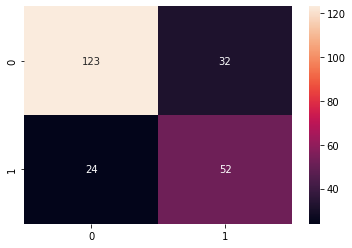

In [26]:
#matplotlib---seaborn---plotly---

import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_test,y_pred ),annot=True, fmt='d')

<AxesSubplot:>

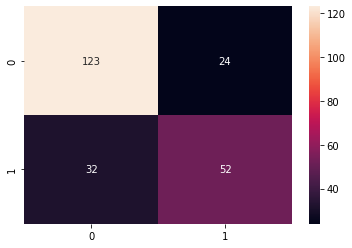

In [27]:
sns.heatmap(metrics.confusion_matrix( y_pred, y_test ), annot=True, fmt='d' )


#### we can also use Confusion mAtrix for further analysis

# CONCLUSION: 

Train_Accuracy = 1.0

Test_Accuracy = .7575


